# Air Quality Activity Module

In this notebook, we will import data from each team and look at comparisons of CO2 and air particulate results in various ways.

In [1]:
# Plotting related python libraries
import matplotlib.pyplot as plt

# Standard csv python library
import csv

# Main python library for mathematical calculations
import numpy as np

# Python libraries for manipulating dates and times as objects
import time
import datetime
import dateutil

In [55]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

def get_data(results,data_index):
    row_counter = 0
    times = []
    data = []
    for r in results:
        #Skip first row (Row that specifies fields)
        row_counter += 1
        if row_counter>1:
            times.append(dateutil.parser.parse(r[0]))
            data.append(float(r[data_index]))
    return data

def get_stats(data,data_type,device_id):
    mean = np.mean(data)
    std = np.std(data)
    printmd('**{} from device {}: {} +/- {}**'.format(data_type,device_id,mean,std))
    return mean,std

## CO2 concentration results

Input data for CO2 concentrations (parts-per-million - ppm) from each team.

### Inside the classroom

In [56]:
#Opens csv files chosen by the user
# "/Users/alihanks/TouchScreen_1_CO22018-05-14_06-35-28.csv"
# "/Users/alihanks/Touchscreen_2_CO22018-05-14_08-05-29.csv"
# "/Users/alihanks/TouchScreen_3_CO22018-05-14_08-47-00.csv"
# "/Users/alihanks/TouchScreen_4_CO22018-05-14_09-17-33.csv"
# "/Users/alihanks/TouchScreen_4_CO22018-05-14_09-44-14.csv"
user_file1 = input("File Name 1: ")
co2_in_results1 = csv.reader(open(user_file1), delimiter=',')

File Name 1: "/Users/alihanks/TouchScreen_1_CO22018-05-14_06-35-28.csv"


In [57]:
user_file2 = input("File Name 2: ")
co2_in_results2 = csv.reader(open(user_file2), delimiter=',')

File Name 2: "/Users/alihanks/Touchscreen_2_CO22018-05-14_08-05-29.csv"


In [58]:
user_file3 = input("File Name 3: ")
co2_in_results3 = csv.reader(open(user_file3), delimiter=',')

File Name 3: "/Users/alihanks/TouchScreen_3_CO22018-05-14_08-47-00.csv"


In [59]:
user_file4 = input("File Name 4: ")
co2_in_results4 = csv.reader(open(user_file4), delimiter=',')

File Name 4: "/Users/alihanks/TouchScreen_4_CO22018-05-14_09-17-33.csv"


In [60]:
user_file5 = input("File Name 5: ")
co2_in_results5 = csv.reader(open(user_file5), delimiter=',')

File Name 5: "/Users/alihanks/TouchScreen_4_CO22018-05-14_09-44-14.csv"


In [61]:
CO2_in_1 = []
CO2_in_2 = []
CO2_in_3 = []
CO2_in_4 = []
CO2_in_5 = []

CO2_in_1 = get_data(co2_in_results1,1)
CO2_in_2 = get_data(co2_in_results2,1)
CO2_in_3 = get_data(co2_in_results3,1)
CO2_in_4 = get_data(co2_in_results4,1)
CO2_in_5 = get_data(co2_in_results5,1)

In [62]:
mean_CO2_1,std_CO2_1 = get_stats(CO2_in_1,"CO2 (ppm) inside",1)
mean_CO2_2,std_CO2_2 = get_stats(CO2_in_2,"CO2 (ppm) inside",2)
mean_CO2_3,std_CO2_3 = get_stats(CO2_in_3,"CO2 (ppm) inside",3)
mean_CO2_4,std_CO2_4 = get_stats(CO2_in_4,"CO2 (ppm) inside",4)
mean_CO2_5,std_CO2_5 = get_stats(CO2_in_5,"CO2 (ppm) inside",5)

**CO2 (ppm) inside from device 1: 1732.03282828 +/- 15.3694189919**

**CO2 (ppm) inside from device 2: 1879.26923077 +/- 6.10206580599**

**CO2 (ppm) inside from device 3: 1446.96717172 +/- 13.4619067463**

**CO2 (ppm) inside from device 4: 2630.125 +/- 5.94111731916**

**CO2 (ppm) inside from device 5: 1584.21978022 +/- 11.4321238139**

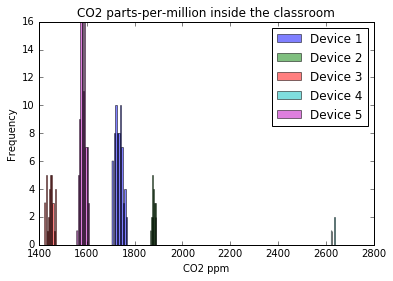

In [10]:
nbins = 10
fig, ax = plt.subplots()
plt.hist(CO2_in_1,bins=nbins, alpha=0.5, label='Device 1')
plt.hist(CO2_in_2,bins=nbins, alpha=0.5, label='Device 2')
plt.hist(CO2_in_3,bins=nbins, alpha=0.5, label='Device 3')
plt.hist(CO2_in_4,bins=nbins, alpha=0.5, label='Device 4')
plt.hist(CO2_in_5,bins=nbins, alpha=0.5, label='Device 5')

plt.legend(loc='best')
plt.title('CO2 parts-per-million inside the classroom')
plt.ylabel('Frequency')
plt.xlabel('CO2 ppm')

### Outside the classroom

In [17]:
#Opens csv files chosen by the user
user_file1 = input("File Name 1: ")
co2_out_results1 = csv.reader(open(user_file1), delimiter=',')

File Name 1: "/Users/alihanks/TouchScreen_1_CO22018-05-14_06-35-28.csv"


In [18]:
user_file2 = input("File Name 2: ")
co2_out_results2 = csv.reader(open(user_file2), delimiter=',')

File Name 2: "/Users/alihanks/Touchscreen_2_CO22018-05-14_08-05-29.csv"


In [19]:
user_file3 = input("File Name 3: ")
co2_out_results3 = csv.reader(open(user_file3), delimiter=',')

File Name 3: "/Users/alihanks/TouchScreen_3_CO22018-05-14_08-47-00.csv"


In [20]:
user_file4 = input("File Name 4: ")
co2_out_results4 = csv.reader(open(user_file4), delimiter=',')

File Name 4: "/Users/alihanks/TouchScreen_4_CO22018-05-14_09-17-33.csv"


In [21]:
user_file5 = input("File Name 5: ")
co2_out_results5 = csv.reader(open(user_file5), delimiter=',')

File Name 5: "/Users/alihanks/TouchScreen_4_CO22018-05-14_09-44-14.csv"


In [22]:
CO2_out_1 = []
CO2_out_2 = []
CO2_out_3 = []
CO2_out_4 = []
CO2_out_5 = []

CO2_out_1 = get_data(co2_out_results1,1)
CO2_out_2 = get_data(co2_out_results2,1)
CO2_out_3 = get_data(co2_out_results3,1)
CO2_out_4 = get_data(co2_out_results4,1)
CO2_out_5 = get_data(co2_out_results5,1)

In [23]:
mean_CO2_1,std_CO2_1 = get_stats(CO2_out_1,"CO2 (ppm) outside",1)
mean_CO2_2,std_CO2_2 = get_stats(CO2_out_2,"CO2 (ppm) outside",2)
mean_CO2_3,std_CO2_3 = get_stats(CO2_out_3,"CO2 (ppm) outside",3)
mean_CO2_4,std_CO2_4 = get_stats(CO2_out_4,"CO2 (ppm) outside",4)
mean_CO2_5,std_CO2_5 = get_stats(CO2_out_5,"CO2 (ppm) outside",5)

**CO2 (ppm) outside from device 1: 1732.03282828 +/- 15.3694189919**

**CO2 (ppm) outside from device 2: 1879.26923077 +/- 6.10206580599**

**CO2 (ppm) outside from device 3: 1446.96717172 +/- 13.4619067463**

**CO2 (ppm) outside from device 4: 2630.125 +/- 5.94111731916**

**CO2 (ppm) outside from device 5: 1584.21978022 +/- 11.4321238139**

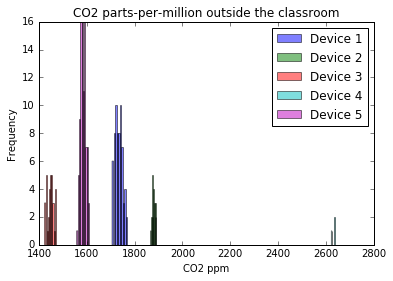

In [24]:
nbins = 10

fig, ax = plt.subplots()
plt.hist(CO2_out_1,bins=nbins, alpha=0.5, label='Device 1')
plt.hist(CO2_out_2,bins=nbins, alpha=0.5, label='Device 2')
plt.hist(CO2_out_3,bins=nbins, alpha=0.5, label='Device 3')
plt.hist(CO2_out_4,bins=nbins, alpha=0.5, label='Device 4')
plt.hist(CO2_out_5,bins=nbins, alpha=0.5, label='Device 5')

plt.legend(loc='best')
plt.title('CO2 parts-per-million outside the classroom')
plt.ylabel('Frequency')
plt.xlabel('CO2 ppm')

### At unique locations on campus

In [25]:
#Opens csv files chosen by the user
user_file1 = input("File Name 1: ")
co2_results1 = csv.reader(open(user_file1), delimiter=',')

File Name 1: "/Users/alihanks/TouchScreen_4_CO22018-05-14_09-44-14.csv"


In [27]:
user_file2 = input("File Name 2: ")
co2_results2 = csv.reader(open(user_file2), delimiter=',')

File Name 2: "/Users/alihanks/TouchScreen_4_CO22018-05-14_09-17-33.csv"


In [28]:
user_file3 = input("File Name 3: ")
co2_results3 = csv.reader(open(user_file3), delimiter=',')

File Name 3: "/Users/alihanks/TouchScreen_3_CO22018-05-14_08-47-00.csv"


In [29]:
user_file4 = input("File Name 4: ")
co2_results4 = csv.reader(open(user_file4), delimiter=',')

File Name 4: "/Users/alihanks/Touchscreen_2_CO22018-05-14_08-05-29.csv"


In [30]:
user_file5 = input("File Name 5: ")
co2_results5 = csv.reader(open(user_file5), delimiter=',')

File Name 5: "/Users/alihanks/TouchScreen_1_CO22018-05-14_06-35-28.csv"


In [31]:
CO2_1 = []
CO2_2 = []
CO2_3 = []
CO2_4 = []
CO2_5 = []

CO2_1 = get_data(co2_results1,1)
CO2_2 = get_data(co2_results2,1)
CO2_3 = get_data(co2_results3,1)
CO2_4 = get_data(co2_results4,1)
CO2_5 = get_data(co2_results5,1)

In [32]:
mean_CO2_1,std_CO2_1 = get_stats(CO2_1,"CO2 (ppm) at location 1",1)
mean_CO2_2,std_CO2_2 = get_stats(CO2_2,"CO2 (ppm) at location 2",2)
mean_CO2_3,std_CO2_3 = get_stats(CO2_3,"CO2 (ppm) at location 3",3)
mean_CO2_4,std_CO2_4 = get_stats(CO2_4,"CO2 (ppm) at location 4",4)
mean_CO2_5,std_CO2_5 = get_stats(CO2_5,"CO2 (ppm) at location 5",5)

**CO2 (ppm) at location 1 from device 1: 1584.21978022 +/- 11.4321238139**

**CO2 (ppm) at location 2 from device 2: 2630.125 +/- 5.94111731916**

**CO2 (ppm) at location 3 from device 3: 1446.96717172 +/- 13.4619067463**

**CO2 (ppm) at location 4 from device 4: 1879.26923077 +/- 6.10206580599**

**CO2 (ppm) at location 5 from device 5: 1732.03282828 +/- 15.3694189919**

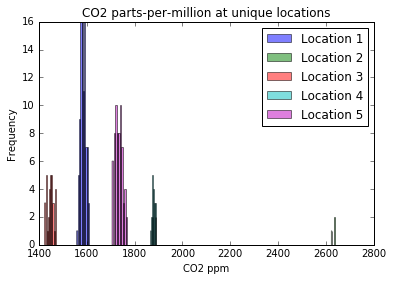

In [33]:
nbins = 10
fig, ax = plt.subplots()
plt.hist(CO2_1,bins=nbins, alpha=0.5, label='Location 1')
plt.hist(CO2_2,bins=nbins, alpha=0.5, label='Location 2')
plt.hist(CO2_3,bins=nbins, alpha=0.5, label='Location 3')
plt.hist(CO2_4,bins=nbins, alpha=0.5, label='Location 4')
plt.hist(CO2_5,bins=nbins, alpha=0.5, label='Location 5')

plt.legend(loc='best')
plt.title('CO2 parts-per-million at unique locations')
plt.ylabel('Frequency')
plt.xlabel('CO2 ppm')

## Air Particulate concentration results

Input data for 2.5 micron particulate matter concentrations (ug/m^3) from each team.

### Inside the classroom

In [85]:
#Opens csv files chosen by the user
# "/Users/alihanks/TouchScreen_1_air_quality2018-05-14_07-09-37.csv"
# "/Users/alihanks/TouchScreen_1_air_quality2018-05-14_07-04-47.csv"
# "/Users/alihanks/TouchScreen_1_air_quality2018-05-14_06-46-24.csv"
# "/Users/alihanks/Touchscreen_2_air_quality2018-05-14_08-01-30.csv"
# "/Users/alihanks/Touchscreen_2_air_quality2018-05-14_07-49-45.csv"
user_file1 = input("File Name 1: ")
aq_in_results1 = csv.reader(open(user_file1), delimiter=',')

File Name 1: "/Users/alihanks/TouchScreen_1_air_quality2018-05-14_07-09-37.csv"


In [80]:
user_file2 = input("File Name 2: ")
aq_in_results2 = csv.reader(open(user_file2), delimiter=',')

File Name 2: "/Users/alihanks/TouchScreen_1_air_quality2018-05-14_07-04-47.csv"


In [81]:
user_file3 = input("File Name 3: ")
aq_in_results3 = csv.reader(open(user_file3), delimiter=',')

File Name 3: "/Users/alihanks/TouchScreen_1_air_quality2018-05-14_06-46-24.csv"


In [82]:
user_file4 = input("File Name 4: ")
aq_in_results4 = csv.reader(open(user_file4), delimiter=',')

File Name 4: "/Users/alihanks/Touchscreen_2_air_quality2018-05-14_08-01-30.csv"


In [83]:
user_file5 = input("File Name 5: ")
aq_in_results5 = csv.reader(open(user_file5), delimiter=',')

File Name 5: "/Users/alihanks/Touchscreen_2_air_quality2018-05-14_07-49-45.csv"


In [86]:
PM25_in_1 = []
PM25_in_2 = []
PM25_in_3 = []
PM25_in_4 = []
PM25_in_5 = []

PM25_in_1 = get_data(aq_in_results1,8)
PM25_in_2 = get_data(aq_in_results2,8)
PM25_in_3 = get_data(aq_in_results3,8)
PM25_in_4 = get_data(aq_in_results4,8)
PM25_in_5 = get_data(aq_in_results5,8)

In [87]:
mean_PM25_1,std_PM25_1 = get_stats(PM25_in_1,"PM25 inside",1)
mean_PM25_2,std_PM25_2 = get_stats(PM25_in_2,"PM25 inside",2)
mean_PM25_3,std_PM25_3 = get_stats(PM25_in_3,"PM25 inside",3)
mean_PM25_4,std_PM25_4 = get_stats(PM25_in_4,"PM25 inside",4)
mean_PM25_5,std_PM25_5 = get_stats(PM25_in_5,"PM25 inside",5)

**PM25 inside from device 1: 0.0 +/- 0.0**

**PM25 inside from device 2: 0.0 +/- 0.0**

**PM25 inside from device 3: 0.0 +/- 0.0**

**PM25 inside from device 4: 0.0 +/- 0.0**

**PM25 inside from device 5: 0.0 +/- 0.0**

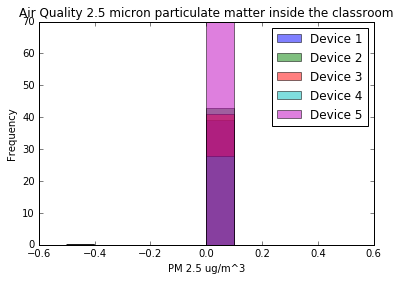

In [88]:
nbins = 10
fig, ax = plt.subplots()
plt.hist(PM25_in_1,bins=nbins, alpha=0.5, label='Device 1')
plt.hist(PM25_in_2,bins=nbins, alpha=0.5, label='Device 2')
plt.hist(PM25_in_3,bins=nbins, alpha=0.5, label='Device 3')
plt.hist(PM25_in_4,bins=nbins, alpha=0.5, label='Device 4')
plt.hist(PM25_in_5,bins=nbins, alpha=0.5, label='Device 5')

plt.legend(loc='best')
plt.title('Air Quality 2.5 micron particulate matter inside the classroom')
plt.ylabel('Frequency')
plt.xlabel('PM 2.5 ug/m^3')

### Outside the classroom

In [ ]:
user_file2 = input("File Name 2: ")
aq_out_results2 = csv.reader(open(user_file2), delimiter=',')

In [ ]:
user_file3 = input("File Name 3: ")
aq_out_results3 = csv.reader(open(user_file3), delimiter=',')

In [ ]:
user_file4 = input("File Name 4: ")
aq_out_results4 = csv.reader(open(user_file4), delimiter=',')

In [ ]:
user_file5 = input("File Name 5: ")
aq_out_results5 = csv.reader(open(user_file5), delimiter=',')

In [ ]:
PM25_out_1 = []
PM25_out_2 = []
PM25_out_3 = []
PM25_out_4 = []
PM25_out_5 = []

PM25_out_1 = get_data(aq_out_results1,8)
PM25_out_2 = get_data(aq_out_results2,8)
PM25_out_3 = get_data(aq_out_results3,8)
PM25_out_4 = get_data(aq_out_results4,8)
PM25_out_5 = get_data(aq_out_results5,8)

In [ ]:
mean_PM25_1,std_PM25_1 = get_stats(PM25_out_1,"PM25 outside",1)
mean_PM25_2,std_PM25_2 = get_stats(PM25_out_2,"PM25 outside",2)
mean_PM25_3,std_PM25_3 = get_stats(PM25_out_3,"PM25 outside",3)
mean_PM25_4,std_PM25_4 = get_stats(PM25_out_4,"PM25 outside",4)
mean_PM25_5,std_PM25_5 = get_stats(PM25_out_5,"PM25 outside",5)

In [ ]:
nbins = 10
fig, ax = plt.subplots()
plt.hist(PM25_out_1,bins=nbins, alpha=0.5, label='Device 1')
plt.hist(PM25_out_2,bins=nbins, alpha=0.5, label='Device 2')
plt.hist(PM25_out_3,bins=nbins, alpha=0.5, label='Device 3')
plt.hist(PM25_out_4,bins=nbins, alpha=0.5, label='Device 4')
plt.hist(PM25_out_5,bins=nbins, alpha=0.5, label='Device 5')

plt.legend(loc='best')
plt.title('Air Quality 2.5 micron particulate matter outside the classroom')
plt.ylabel('Frequency')
plt.xlabel('PM 2.5 ug/m^3')

### At unique locations on campus

In [ ]:
#Opens csv files chosen by the user
user_file1 = input("File Name 1: ")
aq_results1 = csv.reader(open(user_file1), delimiter=',')

In [ ]:
user_file2 = input("File Name 2: ")
aq_results2 = csv.reader(open(user_file2), delimiter=',')

In [ ]:
user_file3 = input("File Name 3: ")
aq_results3 = csv.reader(open(user_file3), delimiter=',')

In [ ]:
user_file4 = input("File Name 4: ")
aq_results4 = csv.reader(open(user_file4), delimiter=',')

In [ ]:
user_file5 = input("File Name 5: ")
aq_results5 = csv.reader(open(user_file5), delimiter=',')

In [ ]:
PM25_1 = []
PM25_2 = []
PM25_3 = []
PM25_4 = []
PM25_5 = []

PM25_1 = get_data(aq_results1,8)
PM25_2 = get_data(aq_results2,8)
PM25_3 = get_data(aq_results3,8)
PM25_4 = get_data(aq_results4,8)
PM25_5 = get_data(aq_results5,8)

In [ ]:
mean_PM25_1,std_PM25_1 = get_stats(PM25_1,"PM25 at location 1",1)
mean_PM25_2,std_PM25_2 = get_stats(PM25_2,"PM25 at location 2",2)
mean_PM25_3,std_PM25_3 = get_stats(PM25_3,"PM25 at location 3",3)
mean_PM25_4,std_PM25_4 = get_stats(PM25_4,"PM25 at location 4",4)
mean_PM25_5,std_PM25_5 = get_stats(PM25_5,"PM25 at location 5",5)

In [ ]:
nbins = 10
fig, ax = plt.subplots()
plt.hist(PM25_1,bins=nbins, alpha=0.5, label='Location 1')
plt.hist(PM25_2,bins=nbins, alpha=0.5, label='Location 2')
plt.hist(PM25_3,bins=nbins, alpha=0.5, label='Location 3')
plt.hist(PM25_4,bins=nbins, alpha=0.5, label='Location 4')
plt.hist(PM25_5,bins=nbins, alpha=0.5, label='Location 5')

plt.legend(loc='best')
plt.title('Air Quality 2.5 micron particulate matter at unique locations')
plt.ylabel('Frequency')
plt.xlabel('PM 2.5 ug/m^3')

In [ ]:
#Choose the number of data points to combine and average
n_merge = int(input("n data points to combine:"))
ndata_a = len(Val25a)
ndata_b = len(Val25b)
nsum_data_a= int(ndata_a/n_merge)
nsum_data_b= int(ndata_b/n_merge)

In [ ]:
data_ave_a = []
data_ave_b = []
data_unc_a = []
data_unc_b = []
merge_times_a = []
merge_times_b = []

for i in range(nsum_data_a):
    #Calculate the mean and standard deviation
    idata = Val25a[i*n_merge:(i+1)*n_merge]
    idata_array = np.asarray(idata) #Convert 'idata' to a numpy array
    aqmean = np.mean(idata_array)
    aqsigma = np.sqrt(np.var(idata_array))
    data_ave_a.append(aqmean)
    data_unc_a.append(aqsigma)
    itimes = timesa[i*n_merge:(i+1)*n_merge]
    itime = itimes[int(len(itimes)/2)]
    merge_times_a.append(itime)

for i in range(nsum_data_b):
    #Calculate the mean and standard deviation
    idata = Val25b[i*n_merge:(i+1)*n_merge]
    idata_array = np.asarray(idata)
    aqmean = np.mean(idata_array)
    aqsigma = np.sqrt(np.var(idata_array))
    data_ave_b.append(aqmean)
    data_unc_b.append(aqsigma)
    itimes = timesb[i*n_merge:(i+1)*n_merge]
    itime = itimes[int(len(itimes)/2)]
    merge_times_b.append(itime)

In [ ]:
fig = plt.figure() 

#Plotting the first graph, each data set on two separate lines
plt.figure(1)
plt.plot(merge_times_a, data_ave_a, "b.", label='File 1')
plt.plot(merge_times_b, data_ave_b, "g.", label = 'File 2')
plt.legend(loc="best")
plt.xlabel("Time")
plt.ylabel("Particle Concentration 2.5")
file_title = "Air Quality Test Results"
plt.title(file_title)
fig.autofmt_xdate()